In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [66]:
df=pd.read_csv("../../data/nifty2016-2024_withincrese.csv",parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,highorlow,isIncreseing
0,04-01-2016,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,43.75,1
1,05-01-2016,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,47.049805,1
2,06-01-2016,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,105.050293,1
3,07-01-2016,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,10.299804,1
4,08-01-2016,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,-36.399903,0


In [38]:
df.isna().sum()

Date            0
Open            5
High            5
Low             5
Close           5
Adj Close       5
Volume          5
highorlow       0
isIncreseing    0
dtype: int64

In [68]:
df=df.dropna()

In [69]:
df.shape

(2055, 9)

In [70]:
df.drop(columns=["Adj Close","isIncreseing","highorlow","Date"])

,Open,High,Low,Close,Volume
0,7924.549805,7937.549805,7781.100098,7791.299805,134700.0
1,7828.399902,7831.200195,7763.250000,7784.649902,145200.0
2,7788.049805,7800.950195,7721.200195,7741.000000,147100.0
3,7673.350098,7674.950195,7556.600098,7568.299805,188900.0
4,7611.649902,7634.100098,7581.049805,7601.350098,157400.0
...,...,...,...,...,...
2055,22766.349610,22794.699220,22348.050780,22475.849610,438100.0
2056,22561.599610,22588.800780,22409.449220,22442.699220,320300.0
2057,22489.750000,22499.050780,22232.050780,22302.500000,297800.0
2058,22231.199220,22368.650390,22185.199220,22302.500000,277400.0


In [79]:
X_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Adj Close","isIncreseing","highorlow","Date"]),df["isIncreseing"])

In [80]:
X_train

,Open,High,Low,Close,Volume
1191,11697.34961,11725.65039,11557.40039,11669.15039,568400.0
391,10081.15039,10081.15039,9998.25000,10013.65039,192700.0
719,10930.70020,10941.20020,10845.34961,10883.75000,409700.0
386,10063.25000,10114.84961,10005.50000,10020.54981,287900.0
517,10604.29981,10702.75000,10586.79981,10666.54981,240100.0
...,...,...,...,...,...
1635,17868.15039,17965.94922,17833.34961,17944.25000,262800.0
1407,17539.19922,17644.59961,17510.44922,17629.50000,503300.0
1559,17189.50000,17322.50000,17071.05078,17245.05078,312900.0
1522,16723.19922,16768.94922,16442.94922,16498.05078,442100.0


In [81]:
x_test

,Open,High,Low,Close,Volume
201,8625.000000,8653.75000,8581.750000,8638.00000,175500.0
1310,14710.500000,14890.25000,14694.950200,14864.54981,457000.0
1238,14258.400390,14367.29981,14221.650390,14347.25000,613500.0
826,11151.650390,11294.75000,11108.299810,11222.04981,398100.0
79,7824.799805,7890.25000,7735.149902,7747.00000,186500.0
...,...,...,...,...,...
954,12025.650390,12028.20020,11956.900390,11968.40039,557700.0
600,10722.599610,10818.00000,10722.599610,10768.34961,220900.0
1969,21295.849610,21390.50000,21232.449220,21349.40039,284700.0
1425,17915.800780,18008.65039,17864.949220,17991.94922,355600.0


In [82]:
y_train

1191    0
391     0
719     1
386     0
517     0
       ..
1635    0
1407    1
1559    1
1522    1
659     1
Name: isIncreseing, Length: 1541, dtype: object

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler=MinMaxScaler()

In [85]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(x_test)

In [86]:
model= LogisticRegression()

In [87]:
model.fit(X=X_train,y=y_train)

LogisticRegression()

In [88]:
y_pred=model.predict(x_test)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [89]:
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [90]:
con = confusion_matrix(y_test,y_pred)
model.score(x_test,y_test)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.45330739299610895

<Axes: >

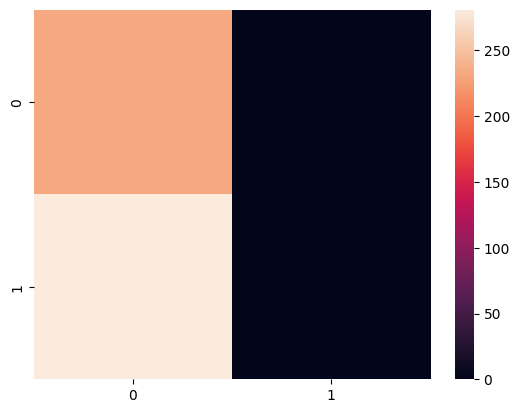

In [95]:
heatmap(con)

In [121]:
X_train,X_test,y_train,y_test=train_test_split(df[["Volume"]],df["isIncreseing"])

In [122]:
X_train

,Volume
334,140800.0
1328,441500.0
1380,320100.0
425,226600.0
1243,789600.0
...,...
1256,884700.0
1208,679000.0
154,164300.0
374,179700.0


In [123]:
X_test

,Volume
1966,249800.0
1391,275400.0
86,152700.0
1884,256100.0
1588,205000.0
...,...
1461,231700.0
1109,767900.0
855,300500.0
1597,220900.0


In [125]:
scaler2=MinMaxScaler()

In [127]:
scaler2.fit(X_train)
X_train=scaler2.transform(X_train)
X_test=scaler2.transform(X_test)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [128]:
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred=model2.predict(X_test)

In [130]:
con2=confusion_matrix(y_test,y_pred)

<Axes: >

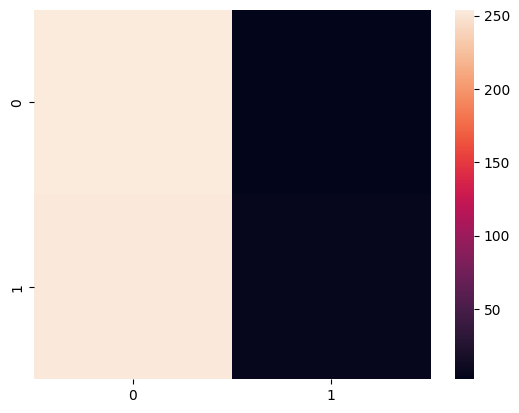

In [131]:
heatmap(con2)

In [133]:
model2.score(X_test,y_test)

0.5038910505836576